<a href="https://colab.research.google.com/github/Akhy999/Machine-Learning-for-Financial-Analysis/blob/main/Stock%20Price%20Data%20Analysis%20and%20CAPM%20Model/Capital_Asset_Pricing_Model_(CAPM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALCULATING EXPECTED RETURNS USING CAPITAL ASSETS PRICING MODEL (CAPM)

The goal here is to compute the expected returns of a security, which is equal to risk free return + risk premium. We assume risk free return (R_f) to be 0 and compute the expected returns using the formula ER = R_f + beta*(R_m - R_f)

# IMPORTING LIBRARIES/DATASETS AND VISUALIZING STOCKS DATA

In [4]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [5]:
# Read the stock data file
stocks_df = pd.read_csv('/content/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [6]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
# Function to normalize the prices based on the initial price
def normalize(df):
  df_normalized = df.copy()
  for col in df_normalized.columns[1:]:
    df_normalized[col] = df_normalized[col]/df_normalized[col][0]
  return df_normalized

In [8]:
# function to plot interactive plots
def interactive_plot(df, title):
  fig = px.line(title = title)
  for col in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[col], name = col)
  fig.show()

In [9]:
interactive_plot(stocks_df, 'Stock Prices')

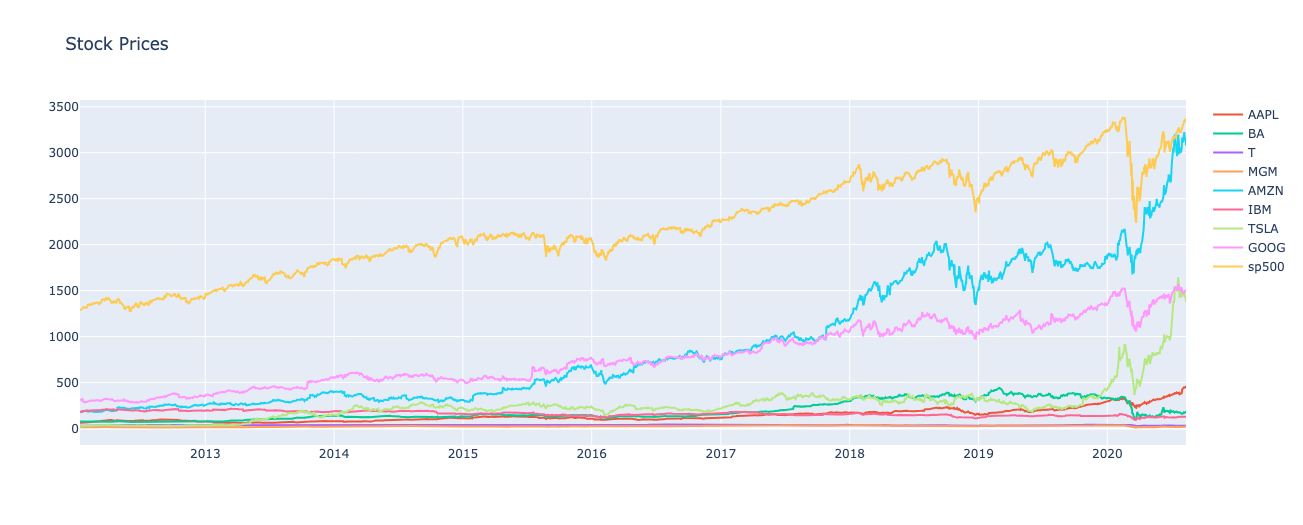

In [10]:
interactive_plot(normalize(stocks_df), 'Normalized Stock Prices')

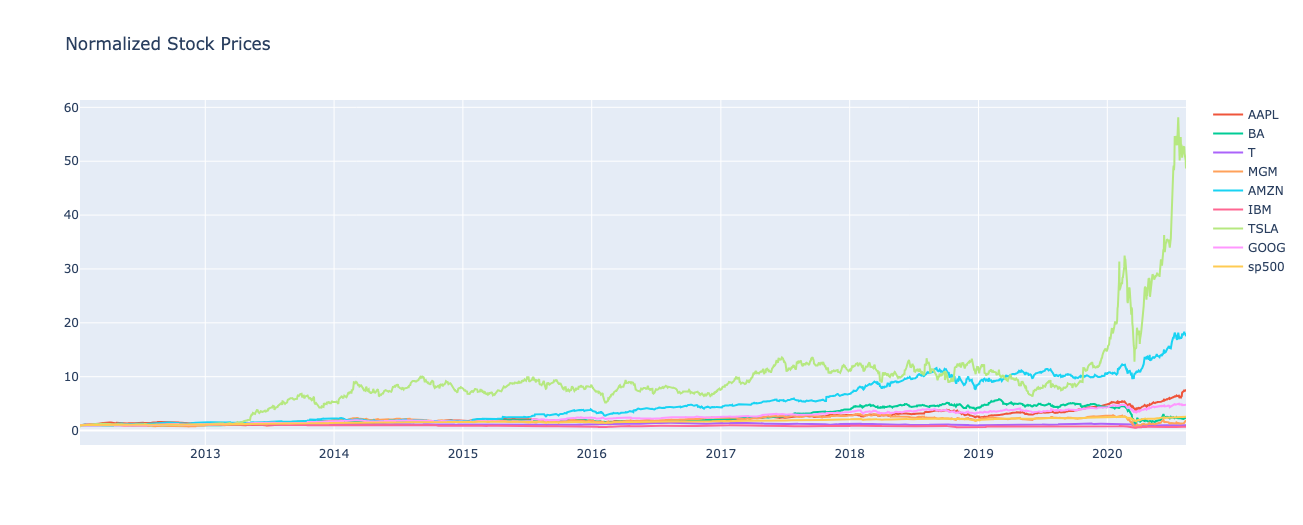

# CALCULATING DAILY RETURNS

In [11]:
# Function to calculate the daily returns
def daily_return(df):

  df_daily_return = df.copy()

  # Loop through each stock
  for i in df.columns[1:]:

    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [12]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


# CALCULATING BETA FOR A SINGLE STOCK (AAPL)

In [13]:
stocks_daily_return['AAPL']

,AAPL
0,0.000000
1,-0.374946
2,1.164812
3,1.038382
4,-0.316937
5,-1.741670
6,1.691647
7,-1.637772
8,6.243905
9,-0.454486


In [14]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

,sp500
0,0.000000
1,-0.494792
2,0.355295
3,1.110793
4,0.493866
5,0.066946
6,0.047134
7,-0.102582
8,0.867914
9,-0.575389


<Axes: xlabel='sp500', ylabel='AAPL'>

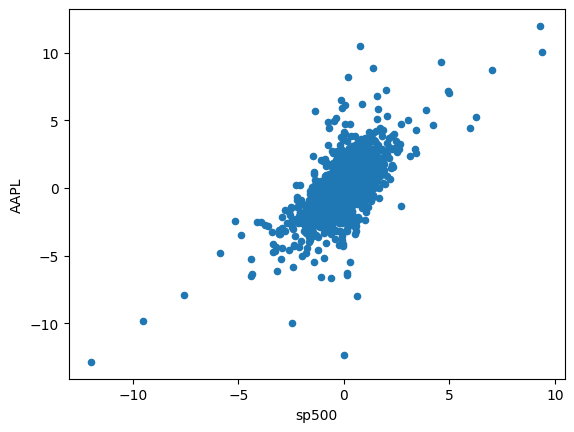

In [15]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [16]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.

beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))

Beta for AAPL stock is = 1.1128924148678097 and alpha is = 0.052812084694402905


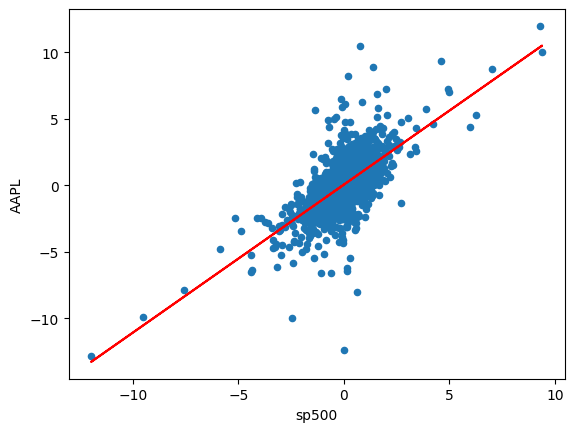

In [17]:
# Plotting the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


# APPLYING THE CAPM FORMULA TO AN AAPL STOCK

In [18]:
beta

1.1128924148678097

In [19]:
# Average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04931600660038911

In [20]:
# Let's calculate the annualized rate of return for S&P500
# 252 days in an year (where trading happens)
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.427633663298055

In [21]:
# Assume risk free rate is zero
# Also we can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculating return for any security (APPL) using CAPM
ER_AAPL = rf + ( beta * (rm-rf) )

In [22]:
ER_AAPL

13.830619238640256

# CALCULATING BETA FOR ALL STOCKS

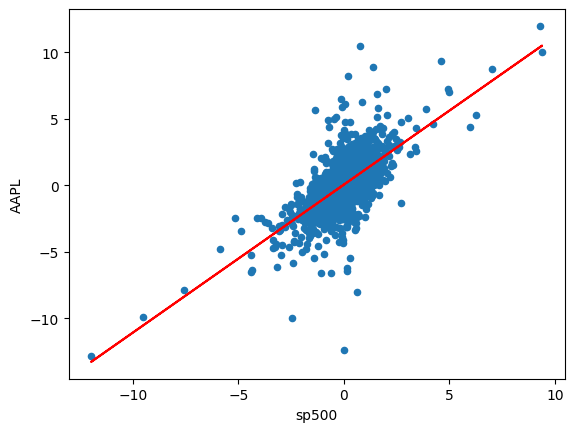

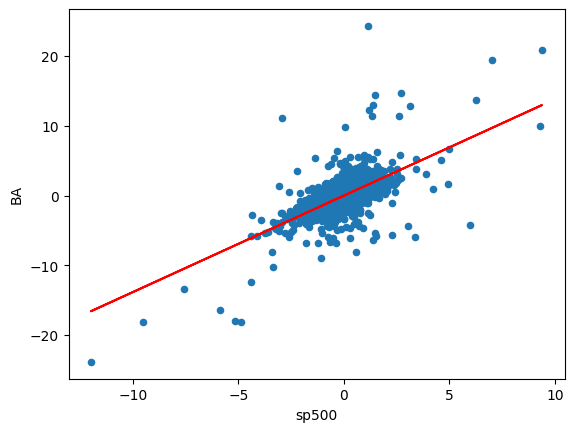

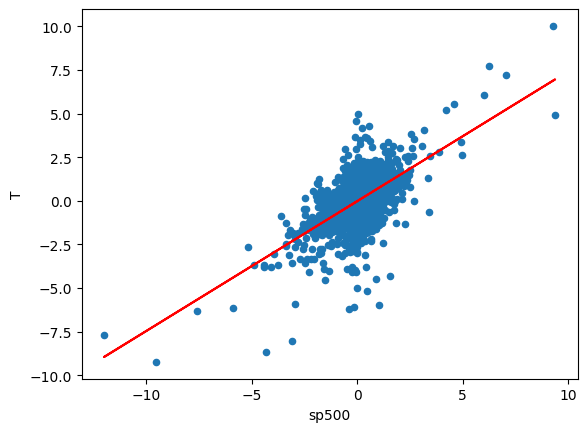

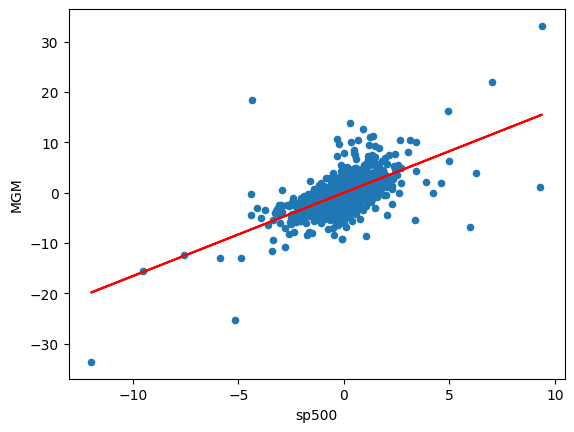

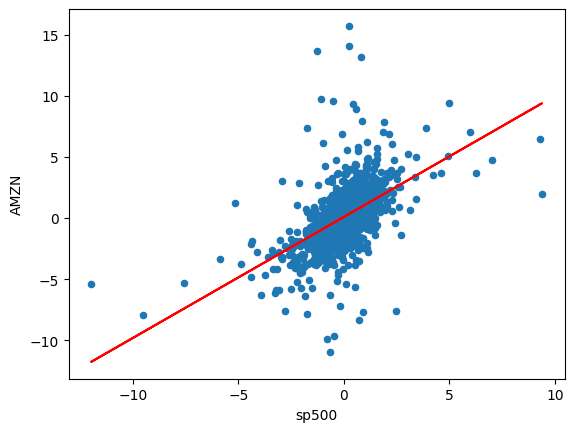

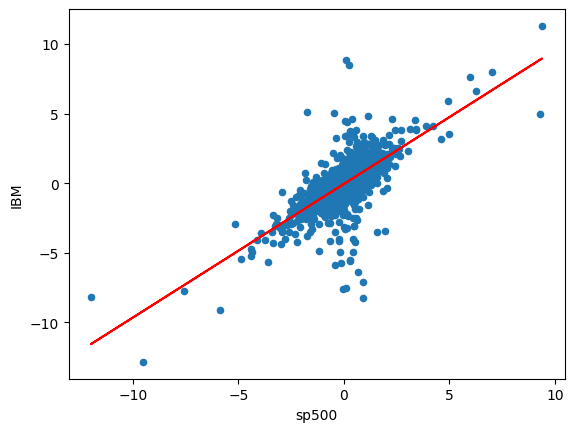

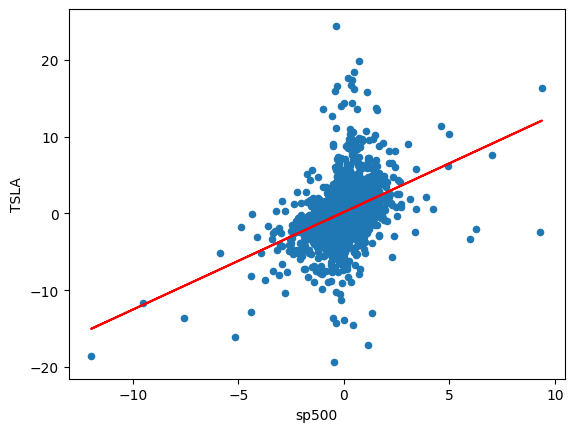

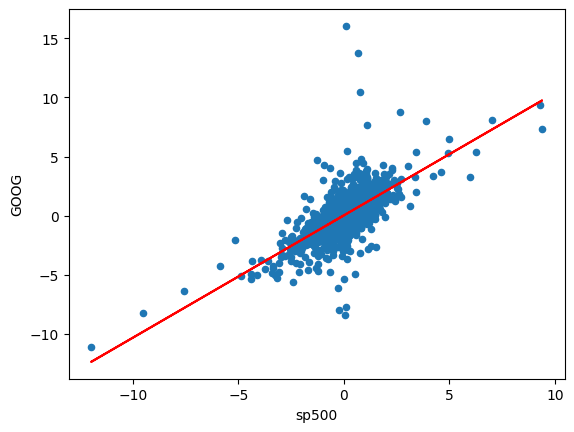

In [23]:
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)

    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [24]:
# Betas for every stock
beta

{'AAPL': 1.1128924148678097,
 'BA': 1.3828672010892775,
 'T': 0.7446293454747844,
 'MGM': 1.653567706518011,
 'AMZN': 0.9917345712576846,
 'IBM': 0.9604149148095246,
 'TSLA': 1.2686150101095903,
 'GOOG': 1.0348817687428562}

In [25]:
# Alphas for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,”
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'AAPL': 0.052812084694402905,
 'BA': -0.0022906983297531543,
 'T': -0.028563430198461616,
 'MGM': -0.016885305520478674,
 'AMZN': 0.1022139641776522,
 'IBM': -0.05345494150445116,
 'TSLA': 0.17583492165165812,
 'GOOG': 0.03335558721467016}

# APPLYING CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [26]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [27]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market
rm

12.427633663298055

In [28]:
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

In [29]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640256%
Expected Return Based on CAPM for BA is 17.185766980127866%
Expected Return Based on CAPM for T is 9.253980720502028%
Expected Return Based on CAPM for MGM is 20.549933694065793%
Expected Return Based on CAPM for AMZN is 12.324913942818466%
Expected Return Based on CAPM for IBM is 11.935684726020382%
Expected Return Based on CAPM for TSLA is 15.765882605403148%
Expected Return Based on CAPM for GOOG is 12.861131506762153%


In [30]:
# Assume weights in the portfolio
np.random.seed(1)
portfolio_weights = np.array(np.random.random(8))
portfolio_weights = portfolio_weights / np.sum(portfolio_weights)
print(portfolio_weights)

[1.88637233e-01 3.25834172e-01 5.17367162e-05 1.36758203e-01
 6.63840874e-02 4.17687720e-02 8.42536138e-02 1.56312182e-01]


In [31]:
# Calculate the portfolio return
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

15.674931844890825

In [32]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 15.674931844890825%

